https://www.cienciadedatos.net/documentos/py08_random_forest_python.html

https://github.com/an-rivas/ENDIREH-data-analysis/blob/preprocesamiento4Cat/OE1_Exploracion/Baseline/Baseline.ipynb

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=forest#sklearn.ensemble.RandomForestClassifier

In [1]:
import pandas as pd
from funciones import CargarPandasDatasetCategoricos, BorrarColumnas, InsertarColumnaNueva

In [2]:
# Custom functions
# ==============================================================================
from funciones import CargarPandasDataset

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from sklearn import tree #La versión que tengo es 0.24.1 y está disponible apartir de la 0.21

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_recall_fscore_support, plot_confusion_matrix
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
def escalar(df, scal):
    ind = df.index
    retail_scaler = pd.DataFrame(scal.fit_transform(df), index=ind)
    retail_scaler.columns = df.columns
    return retail_scaler, scal

In [3]:
def grid(param_grid, nfolds, X_train, y_train, X_test, y_test):
    resultados = {'params':[], 'f1':[], 'f1_ninguno':[], 'f1_abuso':[]}
    
    #hacer grid search
    grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=nfolds, scoring='f1', verbose=1)
    
    #hacer fit
    grid.fit(X_train, y_train)
    
    #predecir y
    y_pred = grid.best_estimator_.predict(X_test)
    
    #obtener parametros 
    resultados['params'].append(grid.best_params_)
    resultados['f1'].append(grid.best_score_)
    f1 = precision_recall_fscore_support(y_test, y_pred)[2]
    resultados['f1_ninguno'].append(f1[0])
    resultados['f1_abuso'].append(f1[1])
    
    #hacer dataset con resultados
    resultados = pd.DataFrame(resultados)
    resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
    resultados = resultados.drop(columns = 'params')
    
    #obtener importancias
    importances = grid.best_estimator_.feature_importances_
    
    return resultados, importances, grid.best_estimator_

## Cargar datos

In [4]:
endireh = CargarPandasDatasetCategoricos('datasets/endireh.csv')

In [5]:
endireh.shape

(23669, 46)

In [6]:
endireh.T

,0,1,2,3,4,5,6,7,8,9,...,23659,23660,23661,23662,23663,23664,23665,23666,23667,23668
CVE_ENT,1,1,1,1,1,1,1,1,1,1,...,32,32,32,32,32,32,32,32,32,32
CVE_MUN,1,1,1,1,1,1,1,1,1,1,...,18,18,18,18,35,35,35,35,58,58
REGION,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
PAREN,2,2,2,2,2,2,3,6,2,3,...,2,2,1,1,2,2,2,3,2,3
EDAD,3,3,4,2,1,3,1,3,1,2,...,3,0,3,5,4,4,2,0,2,3
NIV,4.0,10.0,2.0,10.0,3.0,10.0,3.0,3.0,4.0,10.0,...,3.0,3.0,10.0,3.0,4.0,9.0,2.0,3.0,3.0,3.0
GRA,3.0,5.0,6.0,3.0,3.0,5.0,3.0,3.0,3.0,4.0,...,3.0,3.0,5.0,3.0,3.0,4.0,6.0,3.0,3.0,3.0
DOMINIO,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
T_INSTRUM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0
P1_1,3,3,3,3,3,3,3,2,3,3,...,2,3,3,2,3,3,2,2,2,2


## Preprocesamiento


Solo nos quedamos con las que sufieron 'Abuso y violencia'.

Eliminando los de atención no autorizada

In [7]:
endireh.drop(endireh[endireh["P9_8"]==2].index, axis=0, inplace=True)

'abuso y violencia' y ambos sean 1.

In [8]:
endireh[endireh["P9_8"]>0] = 1

In [9]:
endireh.shape

(22200, 46)

Ninguno(0):	76%
Abuso y violencia(1):	24%


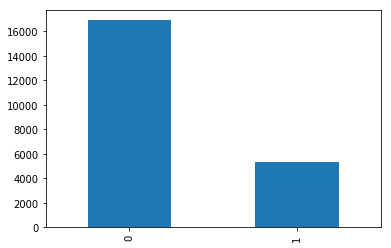

In [13]:
for i,j in zip(['Ninguno(0)', 'Abuso y violencia(1)'], endireh["P9_8"].value_counts()/endireh["P9_8"].value_counts().sum()):
    print(f'{i}:\t{round(j*100)}%')
endireh["P9_8"].value_counts().plot(kind='bar')

In [31]:
scalerMMS = MinMaxScaler() #StandardScaler
scalerSS  = StandardScaler()

In [32]:
df_MMS, scalerMMS = escalar(endireh, scalerMMS)
df_SS,  scalerSS  = escalar(endireh, scalerSS)

In [ ]:
actual = df_MMS

Obtengo la variable objetivo _y_.

In [10]:
actual = endireh['P9_8'].copy()

Al ser el análisis nacional borramos la variable _REGION_ que no pertenece a este estudio en particular y Elimino _y_ del dataset.

In [11]:
actual.drop(columns=['P9_8', 'REGION'], inplace=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(actual, y, test_size=0.33, random_state=5)

## Encontrar los mejores parámetros con _Grid Search_

Declaramos los parametros

### A. 14 de febrero de 2022 46464 combinaciones

In [42]:
param_grid = {
              'criterion'         : ['gini', 'entropy'],
              'max_features'      : ['auto', 'sqrt', 'log2', None],
              'splitter'          : ['best', 'random'],
              'class_weight'      : ['balanced', None],
              'max_depth'         : [6],
              'min_samples_split' : range(250,601, 35),
              'min_samples_leaf'  : range(50, 401, 35),
              #'random_state'      : [5]
             }

### Loop para ajustar un modelo con cada combinación de hiperparámetros

In [20]:
nfolds = 2 # ya que los datos de violencia son 1/4 de los datos totales uso la menor cantidad para el cross validation

In [43]:
%time resultados, importances, modelo = grid(param_grid, nfolds, X_train, y_train, X_test, y_test)

Fitting 2 folds for each of 3872 candidates, totalling 7744 fits
CPU times: user 9min 30s, sys: 28 ms, total: 9min 30s
Wall time: 9min 30s


In [22]:
resultados

,f1,f1_ninguno,f1_abuso,class_weight,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,random_state,splitter
0,0.998036,0.999642,0.998855,balanced,gini,6,auto,50,250,5,best


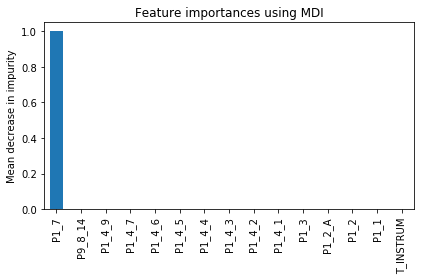

In [23]:
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots()
forest_importances[:15].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [24]:
endireh.P1_7.unique()

array([ 4,  3,  7,  5,  1,  6,  9, 11, 10,  8,  2, 12, 13, 14, 15, 17, 19,
       16, 25, 18, 20])

La pregunta P1_7 es cuántas personas viven en la casas. Esto está demasiado sesgado wtf, cómo se ve?

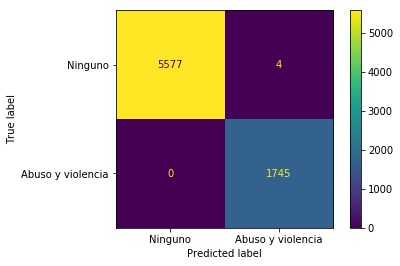

In [27]:
class_names = ['Ninguno', 'Abuso y violencia']

fig, ax = plt.subplots()
plot_confusion_matrix(modelo, X_test, y_test, display_labels=class_names, ax=ax)
plt.show()

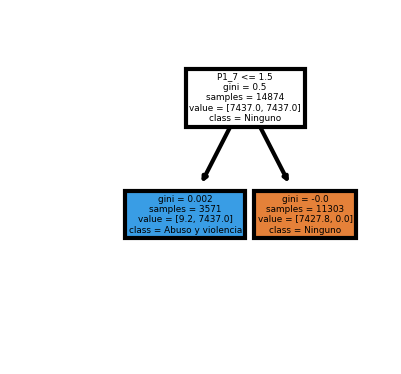

In [28]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 1, 
                         figsize = (1, 1),
                         dpi=300)
tree.plot_tree(modelo,
               feature_names = X_train.columns, 
               class_names=class_names,
               filled = True);
#fig.savefig('imagename.png')

No tiene sentido. Tendré que cambiar los parámetros o borrar esa columna.

### B. 14 de febrero de 2022 Borrado de columna

In [33]:
X_train_a = X_train.drop(['P1_7'], axis=1, inplace=False)
X_test_a = X_test.drop(['P1_7'], axis=1, inplace=False)

In [41]:
param_grid = {
              'criterion'         : ['entropy', 'gini'],
              'max_features'      : ['auto', 'sqrt', None, 'log2'],
              'splitter'          : ['random', 'best'],
              'class_weight'      : [None, 'balanced'],
              'min_samples_split' : range(250,601, 35),
              'min_samples_leaf'  : range(50, 401, 35),
              'max_depth'         : [6],
              #'random_state'      : [5]
             }

In [35]:
%time resultados1, importances1, modelo1 = grid(param_grid, nfolds, X_train_a, y_train, X_test_a, y_test)

Fitting 2 folds for each of 3872 candidates, totalling 7744 fits
CPU times: user 9min 29s, sys: 80 ms, total: 9min 29s
Wall time: 9min 29s


In [36]:
resultados1

,f1,f1_ninguno,f1_abuso,class_weight,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,random_state,splitter
0,0.999719,0.999821,0.999427,None,entropy,6,None,50,250,5,random


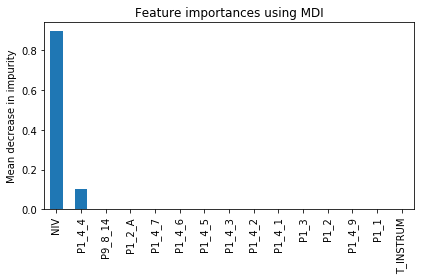

In [37]:
forest_importances = pd.Series(importances1, index=X_train_a.columns)
forest_importances.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots()
forest_importances[:15].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Esto está demasiado sesgado wtf, cómo se ve?

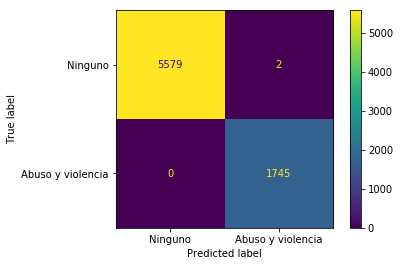

In [39]:
class_names = ['Ninguno', 'Abuso y violencia']

fig, ax = plt.subplots()
plot_confusion_matrix(modelo1, X_test_a, y_test, display_labels=class_names, ax=ax)
plt.show()

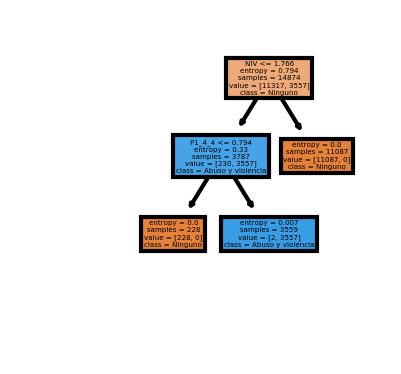

In [40]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 1, 
                         figsize = (1, 1),
                         dpi=300)
tree.plot_tree(modelo1,
               feature_names = X_train.columns, 
               class_names=class_names,
               filled = True);
#fig.savefig('imagename.png')